In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np

In [ ]:
df = pd.read_csv('c:/Users/15623/Desktop/DSC106/projects/project 2/allegations_202007271729.csv')
df

array([2019, 2011, 2012, 2018, 2017, 2015, 2016, 2013, 2014, 2010, 2001,
       2002, 2007, 2003, 2004, 2005, 2006, 2008, 2009, 1997, 1999, 1996,
       2000, 1991, 1992, 1993, 1995, 1989, 1994, 1998, 1990, 1988, 1985,
       1986, 1987, 2020], dtype=int64)

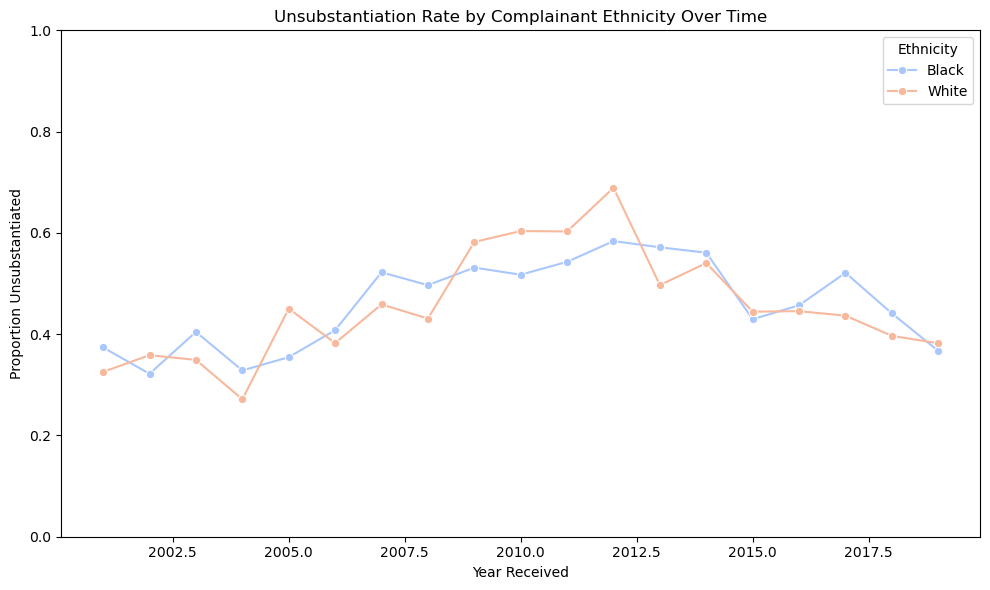

In [8]:
df_against = df.copy()
df_against = df_against[df_against['complainant_ethnicity'].isin(['Black', 'White'])]

# Label substantiated outcomes
df_against['isnt_substantiated'] = df_against['board_disposition'].str.contains('Unsubstantiated', case=False, na=False)

# Group by year and ethnicity
substantiation_by_year = (
    df_against.groupby(['year_received', 'complainant_ethnicity'])['isnt_substantiated']
    .mean()
    .reset_index()
)

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=substantiation_by_year[substantiation_by_year['year_received'].isin(range(2001,2020))],
    x='year_received',
    y='isnt_substantiated',
    hue='complainant_ethnicity',
    marker='o',
    palette='coolwarm'
)

plt.title('Unsubstantiation Rate by Complainant Ethnicity Over Time')
plt.xlabel('Year Received')
plt.ylabel('Proportion Unsubstantiated')
plt.ylim(0, 1)
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()

In [2]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=[substantiation_by_year['year_received'].isin(range(2001,2019))],
    x='year_received',
    y='isnt_substantiated',
    hue='complainant_ethnicity',
    marker='o',
    palette='coolwarm'
)

plt.title('Unsubstantiation Rate by Complainant Ethnicity Over Time')
plt.xlabel('Year Received')
plt.ylabel('Proportion Unsubstantiated')
plt.ylim(0, 1)
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

C:\Users\15623\AppData\Local\Temp\ipykernel_23300\311726703.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


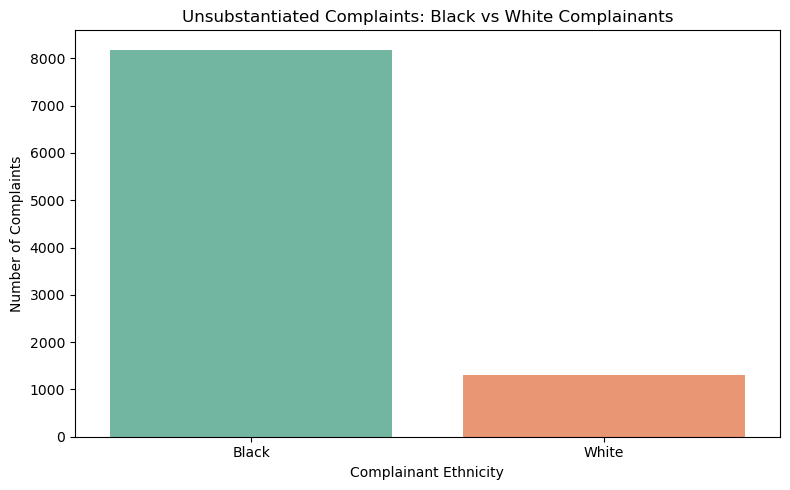

In [10]:
df_for = df.copy()

subst_df = df_for[
    df_for['board_disposition'].str.contains('Unsubstantiated', case=False, na=False) &
    df_for['complainant_ethnicity'].notna()
]

# Keep only Black and White complainants
filtered_df = subst_df[subst_df['complainant_ethnicity'].str.lower().isin(['black', 'white'])]

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(
    data=filtered_df,
    x='complainant_ethnicity',
    palette='Set2'
)

plt.title('Unsubstantiated Complaints: Black vs White Complainants')
plt.xlabel('Complainant Ethnicity')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

In [ ]:


# Filter and preprocess
df_against = df.copy()
df_against = df_against[df_against['complainant_ethnicity'].isin(['Black', 'White'])]
df_against['isnt_substantiated'] = df_against['board_disposition'].str.contains('Unsubstantiated', case=False, na=False)

# Group
substantiation_by_year = (
    df_against.groupby(['year_received', 'complainant_ethnicity'])['isnt_substantiated']
    .mean()
    .reset_index()
)

# Pivot for shading
pivot = substantiation_by_year.pivot(index='year_received', columns='complainant_ethnicity', values='isnt_substantiated')
pivot = pivot.loc[2001:2019].dropna()

# Smooth lines using spline interpolation
x = pivot.index.values
x_smooth = np.linspace(x.min(), x.max(), 300)

def smooth_line(y):
    spline = make_interp_spline(x, y, k=3)
    return spline(x_smooth)

plt.figure(figsize=(10, 6))

# Plot shaded area
plt.fill_between(x_smooth,
                 smooth_line(pivot['Black']),
                 smooth_line(pivot['White']),
                 color='lightgray',
                 alpha=0.4,
                 label='Disparity Area')

# Plot smoothed lines
plt.plot(x_smooth, smooth_line(pivot['Black']), label='Black', color='red', linewidth=2.5)
plt.plot(x_smooth, smooth_line(pivot['White']), label='White', color='blue', linewidth=2.5)

# Annotate peak year (example)
peak_year = pivot['Black'].sub(pivot['White']).idxmax()
peak_gap = pivot.loc[peak_year, 'Black'] - pivot.loc[peak_year, 'White']
plt.annotate(f'Peak Gap: {peak_gap:.2f} in {peak_year}',
             xy=(peak_year, pivot.loc[peak_year, 'Black']),
             xytext=(peak_year + 1, pivot.loc[peak_year, 'Black'] + 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Black Complainants Face Higher Unsubstantiation Rates Over Time', fontsize=14)
plt.xlabel('Year Received')
plt.ylabel('Proportion Unsubstantiated')
plt.ylim(0.3, 0.8)  # exaggerates difference
plt.legend(title='Complainant Ethnicity')
plt.tight_layout()
plt.show()

In [ ]:
# Prepare bar plot data
df_bar = df.copy()
df_bar = df_bar[df_bar['complainant_ethnicity'].isin(['Black', 'White'])]
df_bar['isnt_substantiated'] = df_bar['board_disposition'].str.contains('Unsubstantiated', case=False, na=False)

bar_data = df_bar[df_bar['isnt_substantiated']].groupby('complainant_ethnicity').size().reset_index(name='count')
bar_data = bar_data.sort_values('count', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
colors = ['crimson' if eth == 'Black' else 'gray' for eth in bar_data['complainant_ethnicity']]
bars = plt.bar(bar_data['complainant_ethnicity'], bar_data['count'], color=colors)

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, f'{height:,}', ha='center', fontsize=12)

plt.title('Volume of Unsubstantiated Complaints by Ethnicity', fontsize=14)
plt.suptitle('Black Complainants Face a Disproportionate Share', fontsize=11, color='dimgray')
plt.ylabel('Number of Unsubstantiated Complaints')
plt.xticks(fontsize=12)
plt.yticks([])  # Minimal y-axis
plt.tight_layout()
plt.show()